### 🖼️ Conversión a escala de grises

Se cargaron dos imágenes (una del integrante y otra de un gato con alto contraste) y se convirtieron a escala de grises utilizando OpenCV.  
Esto permite trabajar con una sola matriz de intensidades, facilitando el cálculo de derivadas para la detección de bordes. A continuación se visualizan las imágenes en escala de grises junto con sus respectivas matrices.


Matriz de la imagen del gato (grayscale):
[[ 55  54  53 ...  69  71  73]
 [ 51  51  51 ...  71  71  72]
 [ 52  53  53 ...  72  72  72]
 ...
 [ 69  64  65 ... 108 107 107]
 [ 90  90  96 ... 106 106 106]
 [113 116 123 ... 105 105 105]]
Matriz de la imagen de Sergio (grayscale):
[[147 147 147 ... 153 152 152]
 [146 146 146 ... 153 152 152]
 [146 146 146 ... 153 153 153]
 ...
 [ 91  92  92 ...  32  32  32]
 [ 92  91  91 ...  28  30  32]
 [ 93  92  91 ...  28  32  35]]


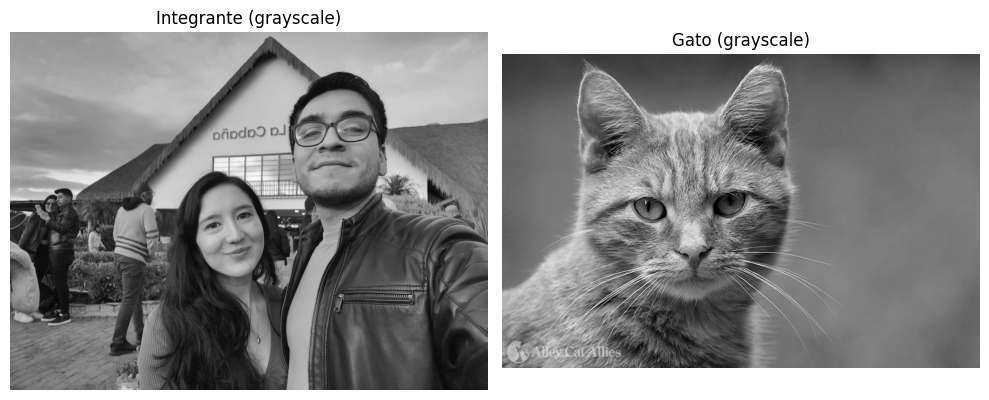

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Cargar imágenes
img_cat = cv2.imread("cat_test.jpg")
img_sergio = cv2.imread("Sergio_Bohada.jpeg")

# Convertir a escala de grises
gray_cat = cv2.cvtColor(img_cat, cv2.COLOR_BGR2GRAY)
gray_sergio = cv2.cvtColor(img_sergio, cv2.COLOR_BGR2GRAY)

#Mostrar nuevas matrices en escala de grises
print("Matriz de la imagen del gato (grayscale):")
print(gray_cat)
print("Matriz de la imagen de Sergio (grayscale):")
print(gray_sergio)

# Mostrar imágenes originales en gris
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.imshow(gray_sergio, cmap='gray')
plt.title("Integrante (grayscale)")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(gray_cat, cmap='gray')
plt.title("Gato (grayscale)")
plt.axis("off")
plt.tight_layout()
plt.show()


### 🧠 Función para detección de bordes con segunda derivada

Se define una función que aplica la aproximación a la segunda derivada sobre una imagen en escala de grises, en ambas direcciones (vertical y horizontal).  
La función calcula el promedio local, la primera derivada y finalmente la segunda derivada en cada dirección, y luego combina los resultados para resaltar los bordes.  
El resultado es una imagen normalizada, lista para visualización.


In [ ]:
def segunda_derivada_aproximada_2d(imagen_gray):
    imagen = imagen_gray.astype(np.float32)

    # Dirección vertical
    A_v = np.zeros_like(imagen)
    A_v[1:-1, :] = (imagen[0:-2, :] + imagen[1:-1, :] + imagen[2:, :]) / 3

    F_v = np.zeros_like(imagen)
    F_v[1:-1, :] = (A_v[2:, :] - A_v[0:-2, :]) / 2

    S_v = np.zeros_like(imagen)
    S_v[1:-1, :] = (F_v[2:, :] - F_v[0:-2, :]) / 2

    # Dirección horizontal
    A_h = np.zeros_like(imagen)
    A_h[:, 1:-1] = (imagen[:, 0:-2] + imagen[:, 1:-1] + imagen[:, 2:]) / 3

    F_h = np.zeros_like(imagen)
    F_h[:, 1:-1] = (A_h[:, 2:] - A_h[:, 0:-2]) / 2

    S_h = np.zeros_like(imagen)
    S_h[:, 1:-1] = (F_h[:, 2:] - F_h[:, 0:-2]) / 2

    # Combinación de segunda derivada
    S_total = np.sqrt(S_v**2 + S_h**2)

    # Normalización para visualización
    S_norm = np.clip(S_total + 128, 0, 255).astype(np.uint8)

    return S_norm


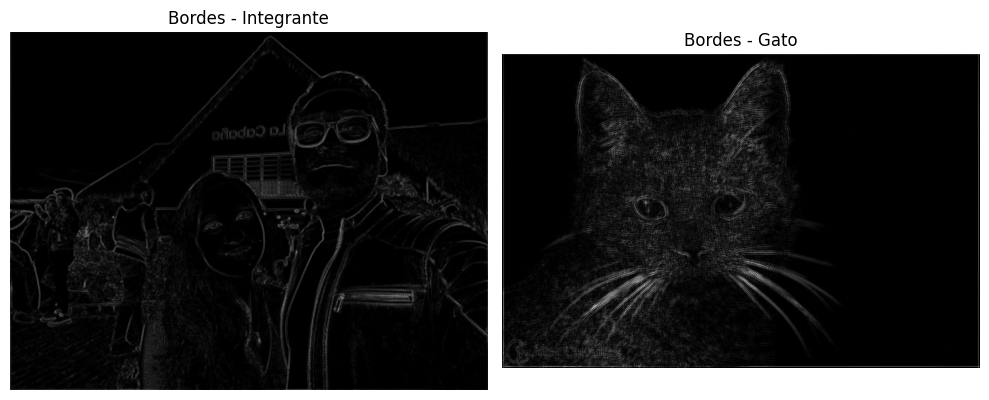

In [9]:
S_cat = segunda_derivada_aproximada_2d(gray_cat)
S_sergio = segunda_derivada_aproximada_2d(gray_sergio)

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.imshow(S_sergio, cmap='gray')
plt.title("Bordes - Integrante")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(S_cat, cmap='gray')
plt.title("Bordes - Gato")
plt.axis("off")
plt.tight_layout()
plt.show()

